In [3]:
#!pip install statsmodels
#!pip install distfit
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy
import scipy.stats as st
from distfit import distfit

In [5]:
df = pd.read_csv("./resources/Books.csv")
df

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,4.28,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,7.448889,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,1984,George Orwell,3250211,72375,4.19,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,6.845556,https://www.goodreads.com/book/show/40961427-1984
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,3.93,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,5.100000,https://www.goodreads.com/book/show/3.Harry_Po...
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,4.48,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,8.791111,https://www.goodreads.com/book/show/4671.The_G...
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,4.28,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,7.448889,https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,The Snows of Kilimanjaro and Other Stories,Ernest Hemingway,33823,1453,3.87,144.0,1961.0,0,"['Fiction', 'Short Stories', 'Classics']",NaN,5.228,4.697778,https://www.goodreads.com/book/show/244261.The...
992,992,The Street of Crocodiles,Bruno Schulz,7034,599,4.13,160.0,1933.0,0,"['Fiction', 'Short Stories', 'European Literat...",2.0,6.799,6.442222,https://www.goodreads.com/book/show/4645.The_S...
993,993,Riddley Walker,Russell Hoban,7075,819,4.02,256.0,1980.0,0,"['Fiction', 'Science Fiction', 'Apocalyptic']",3.0,6.134,5.704444,https://www.goodreads.com/book/show/428.Play_I...
994,994,Play It As It Lays,Joan Didion,29879,2278,3.88,231.0,1970.0,0,"['Fiction', 'Classics', 'Novels']",NaN,5.289,4.764444,https://www.goodreads.com/book/show/776573.Rid...


In [10]:
data1 = df["minmax_norm_ratings"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0153135] [loc=6.374 scale=1.235] 
[distfit] >[expon     ] [RSS: 0.8881359] [loc=1.000 scale=5.374] 
[distfit] >[pareto    ] [RSS: 0.8944523] [loc=-93583774.901 scale=93583775.901] 
[distfit] >[dweibull  ] [RSS: 0.0395142] [loc=6.337 scale=1.071] 
[distfit] >[t         ] [RSS: 0.0168758] [loc=6.379 scale=1.212] 
[distfit] >[genextreme] [RSS: 0.0078507] [loc=5.946 scale=1.272] 
[distfit] >[gamma     ] [RSS: 0.0189123] [loc=-18.226 scale=0.064] 
[distfit] >[lognorm   ] [RSS: 0.0165452] [loc=-223.208 scale=229.578] 
[distfit] >[beta      ] [RSS: 0.0087586] [loc=-1659042.296 scale=1659057.588] 
[distfit] >[uniform   ] [RSS: 0.5525509] [loc=1.000 scale=9.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x7f57eb2199d0>, 'params': (0.30149612336799425, 5.945537091928044, 1.2720670859342675), 'name': 'genex

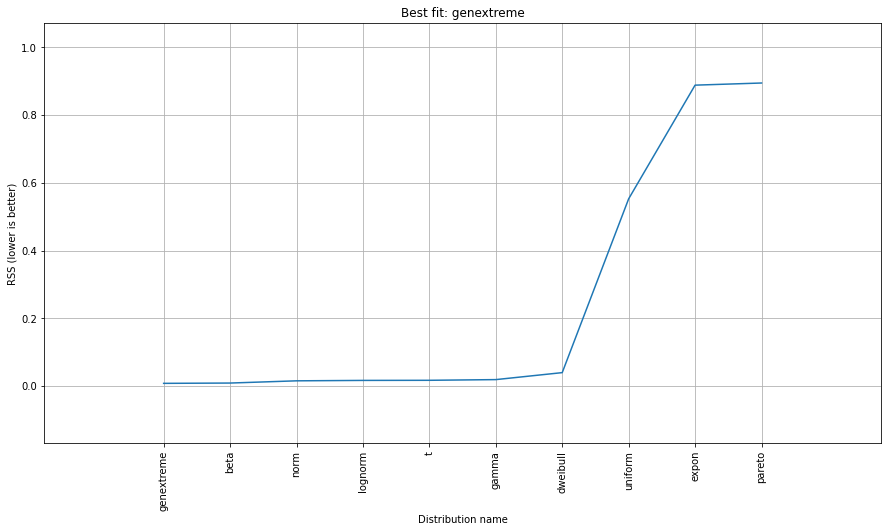

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [17]:
X = data1
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)



# Best fitted model
best_distr = dist.model
print(best_distr)


# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


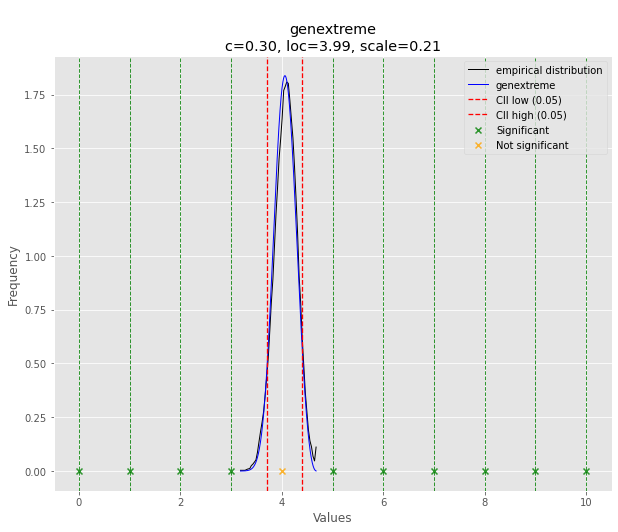

<Figure size 1152x864 with 0 Axes>

In [46]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.02040816, 0.02040816, 0.02040816, 0.        , 0.        ])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()

plt.savefig('MinMaxNormRatings_BestFit.jpg')

In [15]:
data2 = df["mean_norm_ratings"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0124284] [loc=5.971 scale=1.372] 
[distfit] >[expon     ] [RSS: 0.7194103] [loc=0.000 scale=5.971] 
[distfit] >[pareto    ] [RSS: 1.1554864] [loc=-1.542 scale=1.542] 
[distfit] >[dweibull  ] [RSS: 0.0408222] [loc=5.874 scale=1.200] 
[distfit] >[t         ] [RSS: 0.0136957] [loc=5.977 scale=1.346] 
[distfit] >[genextreme] [RSS: 0.0063758] [loc=5.495 scale=1.413] 
[distfit] >[gamma     ] [RSS: 0.0158329] [loc=-21.670 scale=0.069] 
[distfit] >[lognorm   ] [RSS: 0.0132085] [loc=-206.532 scale=212.502] 
[distfit] >[beta      ] [RSS: 0.0071410] [loc=-1845189.265 scale=1845205.133] 
[distfit] >[uniform   ] [RSS: 0.4475663] [loc=0.000 scale=10.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x7f57eb2199d0>, 'params': (0.30149573318285855, 5.49473673970186, 1.413442350186814), 'name': 'genextreme', 'RSS': 

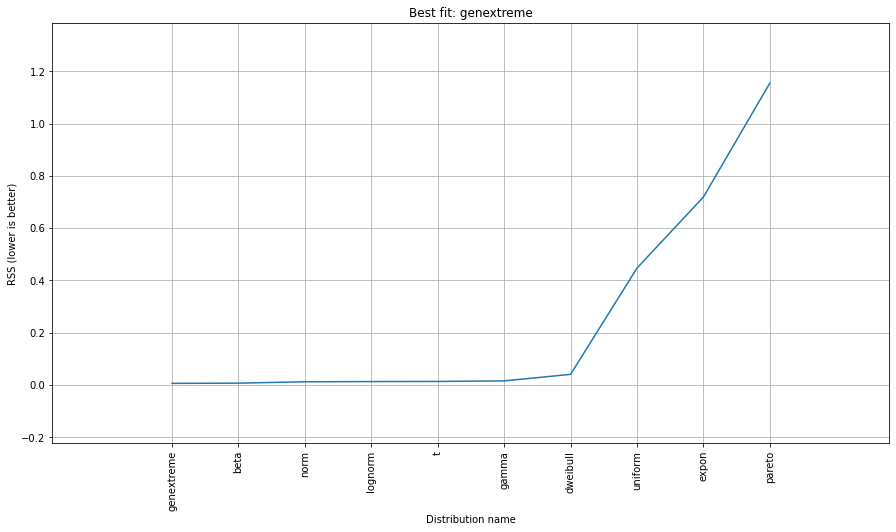

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [16]:
X = data2

# Retrieve P-value for y
y = [0,1,2,3,4,5,6,7,8,9,10]


# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)


# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


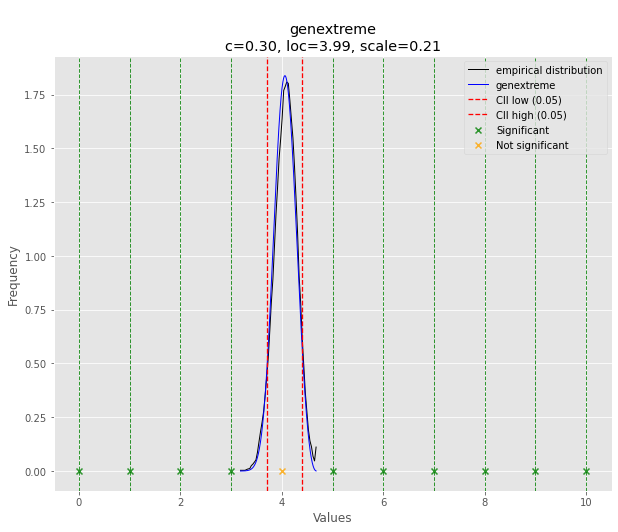

<Figure size 1152x864 with 0 Axes>

In [45]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.02040816, 0.02040816, 0.02040816, 0.        , 0.        ])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()


plt.savefig('MeanNormRatings_BestFit.jpg')

In [20]:
data3 = df["Rating Value"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.5587076] [loc=4.060 scale=0.204] 
[distfit] >[expon     ] [RSS: 32.4035105] [loc=3.170 scale=0.890] 
[distfit] >[pareto    ] [RSS: 35.5821207] [loc=-0.007 scale=3.177] 
[distfit] >[dweibull  ] [RSS: 1.0808578] [loc=4.074 scale=0.176] 
[distfit] >[t         ] [RSS: 0.6156876] [loc=4.061 scale=0.201] 
[distfit] >[genextreme] [RSS: 0.2865178] [loc=3.989 scale=0.211] 
[distfit] >[gamma     ] [RSS: 0.6858641] [loc=-0.003 scale=0.011] 
[distfit] >[lognorm   ] [RSS: 0.6014328] [loc=-49.194 scale=53.253] 
[distfit] >[beta      ] [RSS: 0.3204199] [loc=-274692.100 scale=274697.635] 
[distfit] >[uniform   ] [RSS: 20.1597346] [loc=3.170 scale=1.490] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x7f57eb2199d0>, 'params': (0.3014889288523249, 3.988772758021647, 0.21057999487067902), 'name': 'genextreme', 'RSS': 0

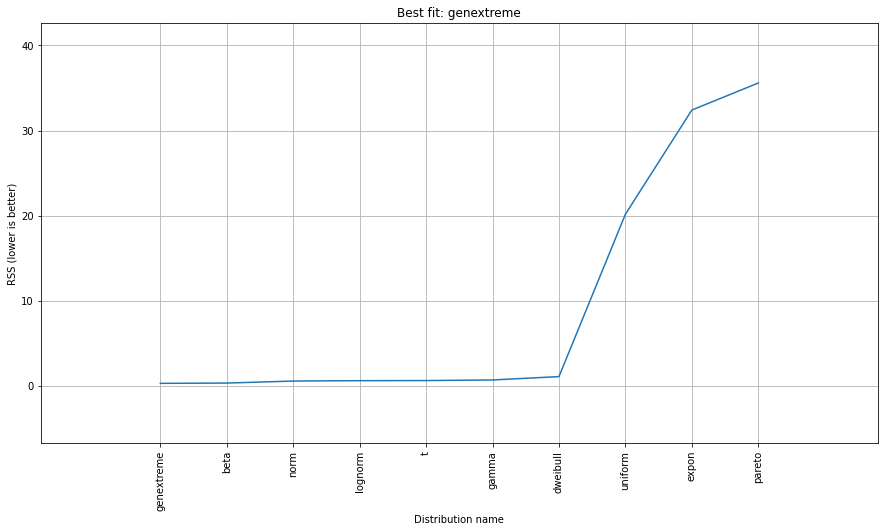

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [21]:
X = data3

# Retrieve P-value for y
y = [0,1,2,3,4,5,6,7,8,9,10]


# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)

# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


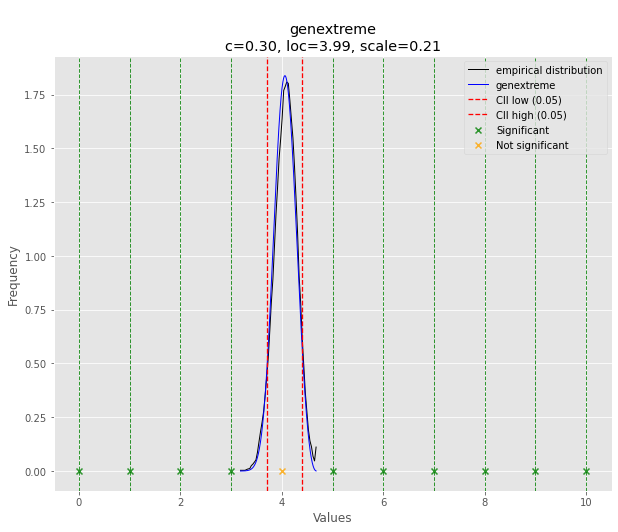

<Figure size 1152x864 with 0 Axes>

In [42]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
np.array(['down', 'up', 'down', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.1,0.1,0.1])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()


plt.savefig('Ratings_BestFit.jpg')

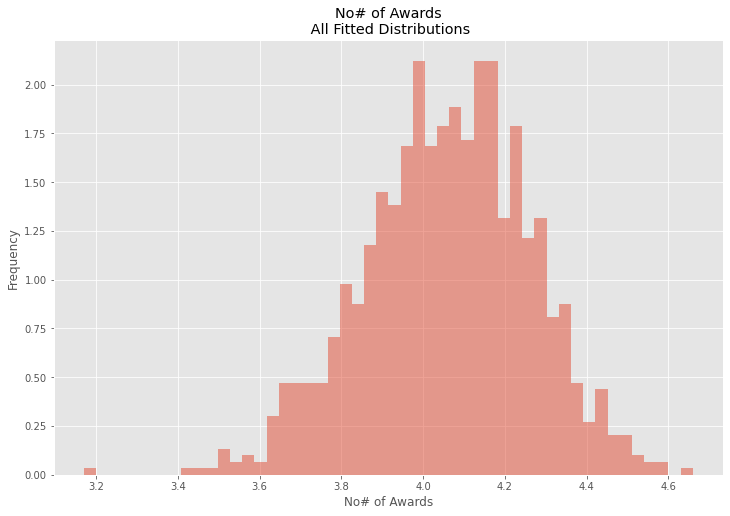

In [41]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(data3)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'No# of Awards\n All Fitted Distributions')
ax.set_xlabel(u'No# of Awards')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

plt.savefig('Awards_BestFit.jpg')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

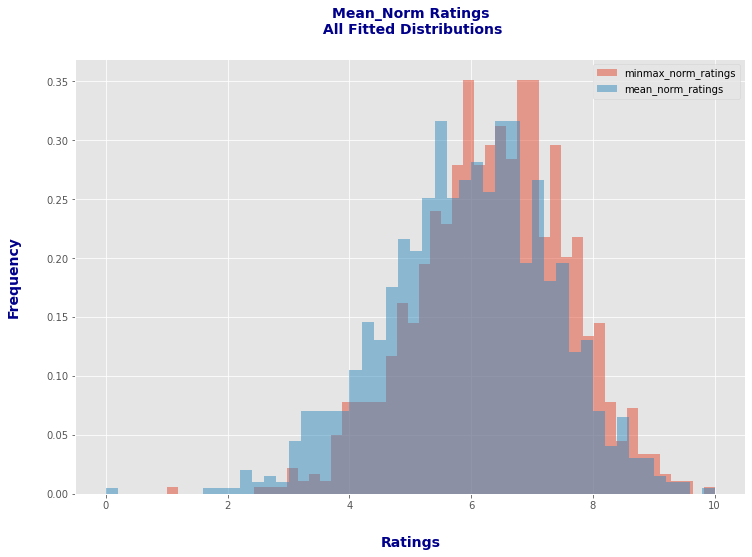

In [39]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

#fig, ax = plt.subplots()
# Load data from statsmodels datasets
data1 = pd.Series(data1)
data2 = pd.Series(data2)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data1.plot(kind='hist', bins=50, density=True, alpha=0.5)
fig = data2.plot(kind='hist', bins=50, density=True, alpha=0.5)
# Save plot limits
data1YLim = ax.get_ylim()
data2YLim = fig.get_ylim()

# Find best fit distribution
best_fit_name_ax, best_fit_params_ax = best_fit_distribution(data1, 200, ax)
best_fit_name_fig, best_fit_params_fig = best_fit_distribution(data2, 200, fig)
best_dist_ax = getattr(st, best_fit_name_ax)
best_dist_fig = getattr(st, best_fit_name_fig)

# Update plots
ax.set_ylim(data1YLim)
fig.set_ylim(data2YLim)

# Make PDF with best params 
pdf_ax = make_pdf(best_dist_ax, best_fit_params_ax)
pdf_fig = make_pdf(best_dist_fig, best_fit_params_fig)

c=plt.legend()
plt.xlabel('Ratings', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Frequency', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Mean_Norm Ratings\n All Fitted Distributions', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('Comparison_BestFit.jpg')
plt.tight_layout